In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
iris=pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
iris.shape

(150, 5)

In [12]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [15]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


***DATA VISUALIZATION***

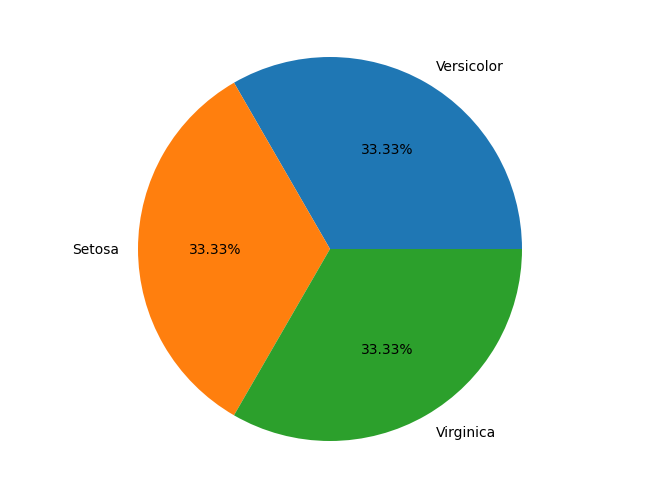

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

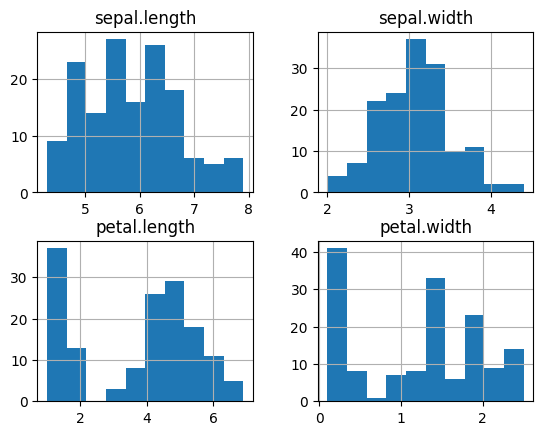

In [23]:
iris.hist()
plt.show()

<Axes: xlabel='variety', ylabel='sepal.width'>

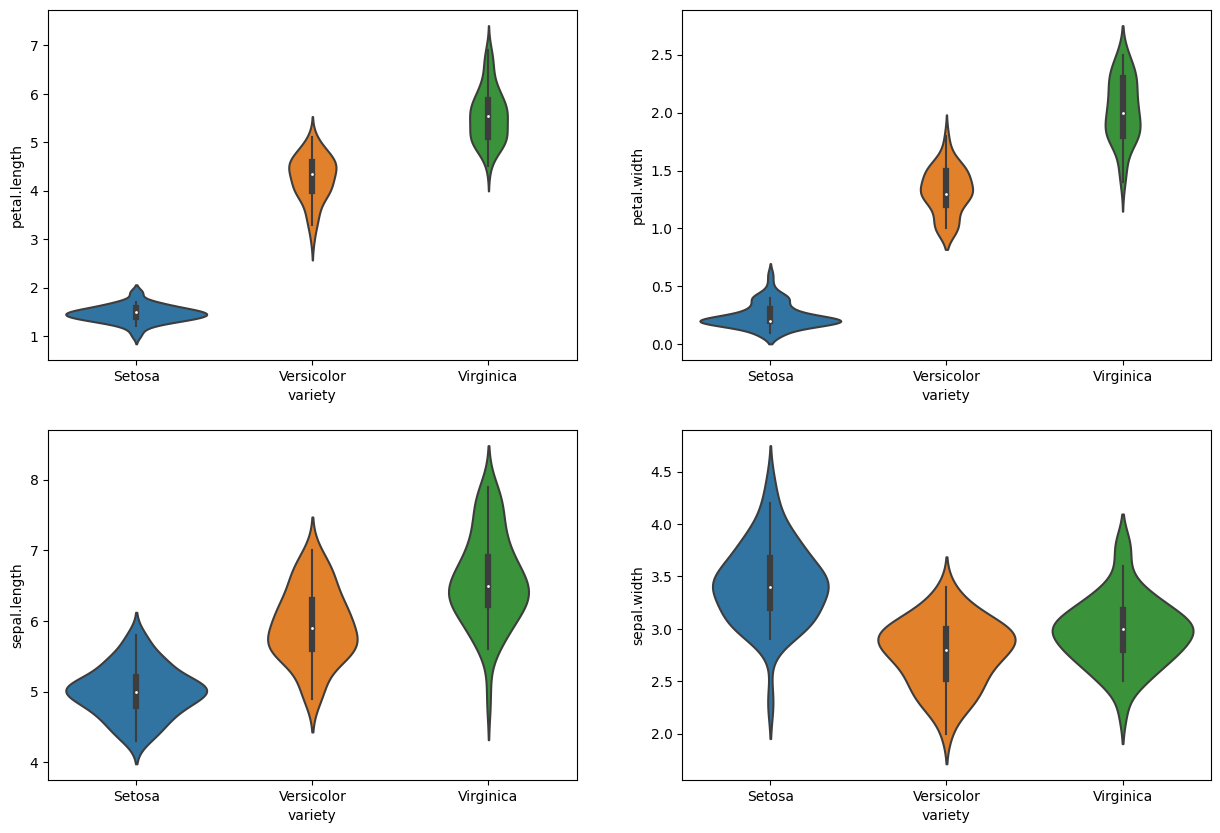

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='petal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='sepal.width',data=iris)

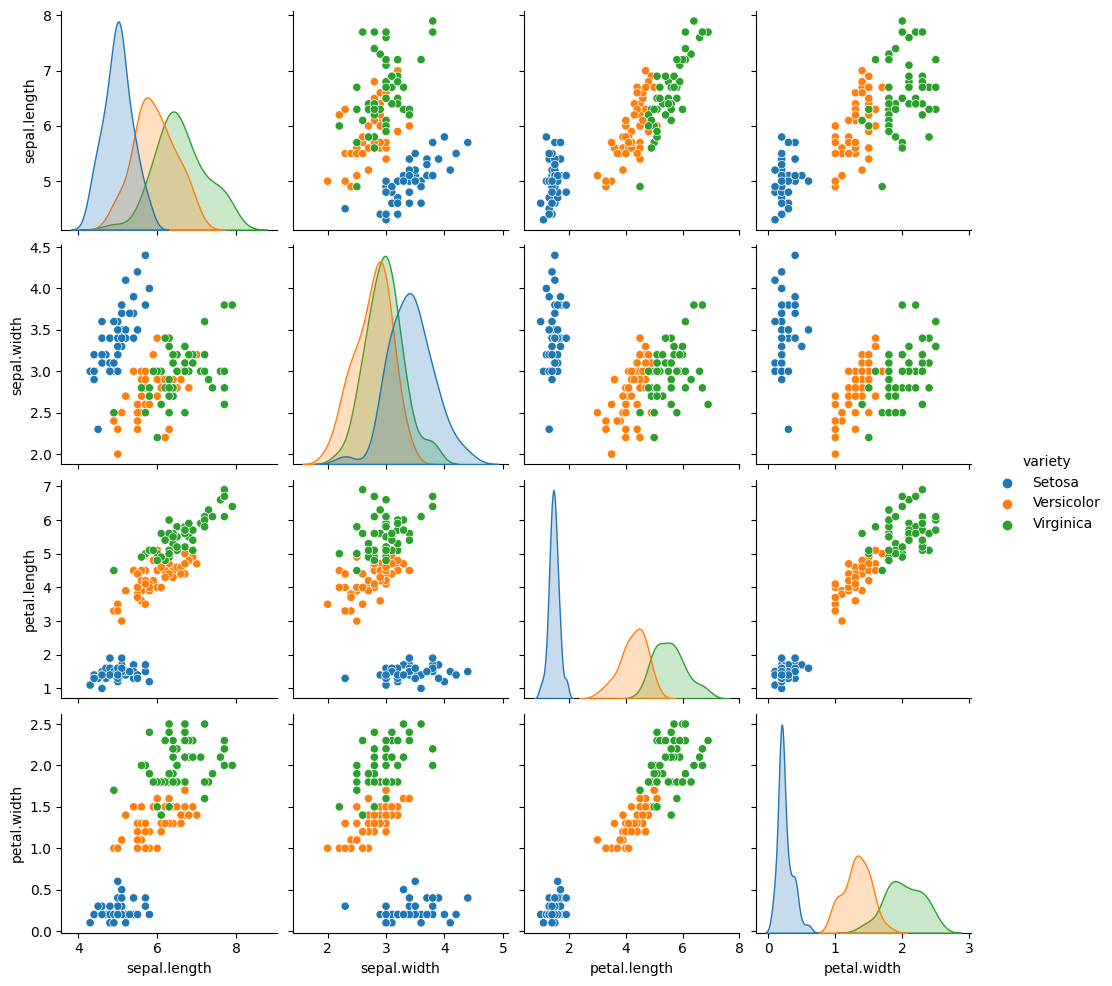

In [27]:
sns.pairplot(iris,hue='variety');

<Axes: xlabel='sepal.width', ylabel='petal.width'>

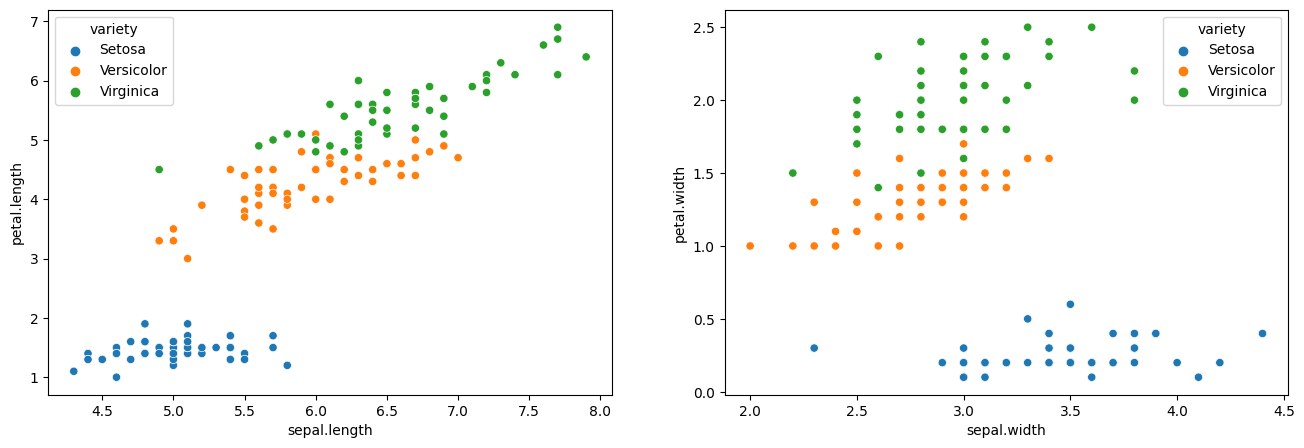

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal.length',y='petal.length',data=iris,hue='variety',ax=ax1)
sns.scatterplot(x='sepal.width',y='petal.width',data=iris,hue='variety',ax=ax2)

In [33]:
corr = iris.corr(method = 'pearson')
corr

<ipython-input-33-e027055a19f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr(method = 'pearson')


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-103-e847d7cf9a2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True,cmap='rainbow')


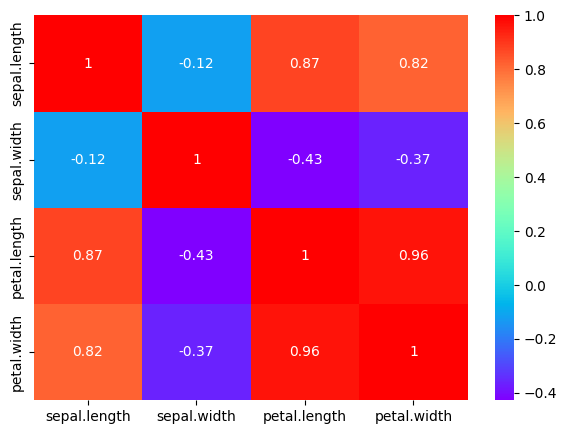

In [103]:
plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(), annot=True,cmap='rainbow')
plt.show()

***BUILDING A MODEL***

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['variety'] = le.fit_transform = (iris['variety'])

In [66]:
X = iris.drop(columns=['variety'])
Y = iris['variety']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

***Logistic Regression***

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

LogisticRegression()

In [69]:
pred=lr.predict(x_test)

In [70]:
accuracy_score(y_test,pred)

0.9555555555555556

In [71]:
confusion_matrix(y_test,pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 12]])

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.93      0.93      0.93        15
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



***Support Vector Machine***

In [73]:
from sklearn.svm import SVC
model1=SVC(kernel="linear")

In [74]:
msvc=model1.fit(x_train,y_train)

In [78]:
pred1=msvc.predict(x_test)

In [79]:
accuracy_score(y_test,pred1)

1.0

In [80]:
confusion_matrix(y_test,pred1)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

In [81]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      1.00      1.00        15
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



***Decision Tree***

In [83]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [84]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [85]:
pred2=df.predict(x_test)

In [86]:
accuracy_score(y_test,pred2)

0.9333333333333333

In [88]:
confusion_matrix(y_test,pred2)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 11]])

In [89]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



***Gaussian Naive Bayes***

In [90]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [91]:
nb.fit(x_train,y_train)

GaussianNB()

In [92]:
pred3=nb.predict(x_test)

In [93]:
accuracy_score(y_test,pred3)

0.9333333333333333

In [95]:
confusion_matrix(y_test,pred3)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 11]])

In [96]:
print(metrics.classification_report(y_test,pred3))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



***K-Nearest Neighbors Classifier***

In [97]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
pred4=knn.predict(x_test)

In [99]:
accuracy_score(y_test,pred4)

0.9777777777777777

In [100]:
confusion_matrix(y_test,pred4)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]])

In [101]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      0.93      0.97        15
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

